In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Reading the Excel file
df = pd.read_excel('Loan.xlsx')
df

,Income,YearsCurrntJob,Education,Paid
0,51,2,High School,NO
1,51,4,Bachelor,NO
2,55,2,Masters,Yes
3,56,5,High School,NO
4,65,1,Bachelor,NO
5,70,3,Bachelor,NO
6,70,8,Masters,Yes
7,75,1,Masters,Yes
8,75,5,Bachelor,Yes
9,77,6,High School,NO


In [3]:
# Converting the 'Paid' column to a categorical type
df['Paid'] = df['Paid'].astype('category')
df

,Income,YearsCurrntJob,Education,Paid
0,51,2,High School,NO
1,51,4,Bachelor,NO
2,55,2,Masters,Yes
3,56,5,High School,NO
4,65,1,Bachelor,NO
5,70,3,Bachelor,NO
6,70,8,Masters,Yes
7,75,1,Masters,Yes
8,75,5,Bachelor,Yes
9,77,6,High School,NO


In [4]:
# Mapping Education to numerical values
education_map = {'High School': 1, 'Bachelor': 2, 'Masters': 3}
df['Education_ordinal'] = df['Education'].map(education_map)
df

,Income,YearsCurrntJob,Education,Paid,Education_ordinal
0,51,2,High School,NO,1
1,51,4,Bachelor,NO,2
2,55,2,Masters,Yes,3
3,56,5,High School,NO,1
4,65,1,Bachelor,NO,2
5,70,3,Bachelor,NO,2
6,70,8,Masters,Yes,3
7,75,1,Masters,Yes,3
8,75,5,Bachelor,Yes,2
9,77,6,High School,NO,1


In [7]:
# Splitting features and target
X = df.drop(columns=['Paid', 'Education'])  # Dropping 'Paid' as target
y = df['Paid']  # Target variable

In [17]:
# Creating the decision tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=43)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=43)

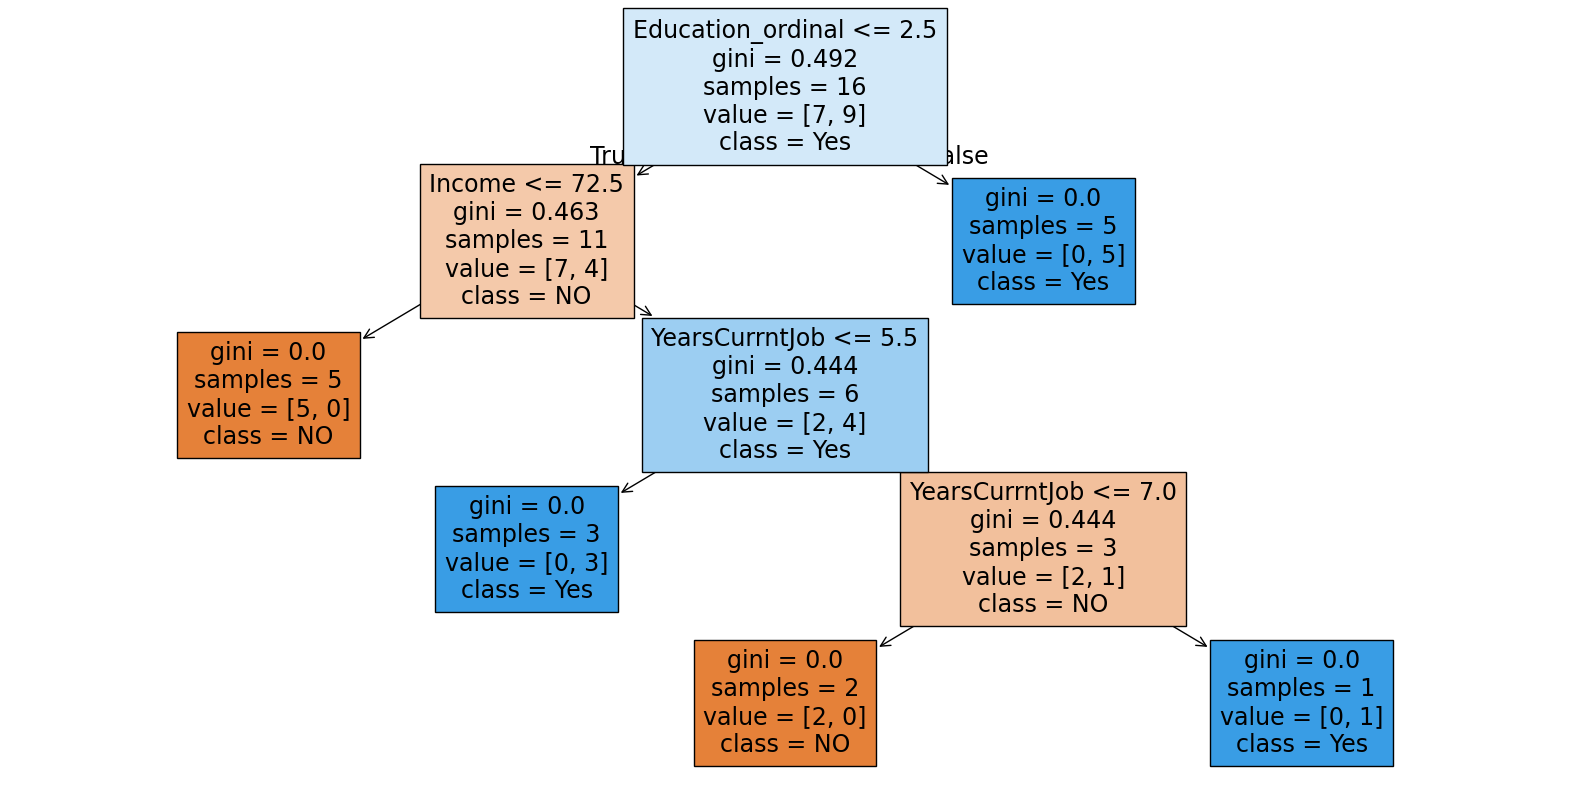

In [18]:
# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=df['Paid'].cat.categories.astype(str))
plt.show()

In [20]:
def transformer(df):
    transformed_df= df.copy()
    # Mapping Education to numerical values
    education_map = {'High School': 1, 'Bachelor': 2, 'Masters': 3}
    transformed_df['Education_ordinal'] = transformed_df['Education'].map(education_map)
    transformed_df = transformed_df.drop(columns=['Education'])
            
    return transformed_df

In [21]:
testData =  [
    {
        "Income": 51,
        "YearsCurrntJob": 2,
        "Education": "High School"
        
    }
]
testDf = pd.DataFrame(testData)
# answerListSampl1
transformer(testDf)

,Income,YearsCurrntJob,Education_ordinal
0,51,2,1


In [23]:
newDf = df.copy()

In [24]:
newDf['predict'] = dt.predict(newDf.drop(columns=['Paid', 'Education']))
newDf

,Income,YearsCurrntJob,Education,Paid,Education_ordinal,predict
0,51,2,High School,NO,1,NO
1,51,4,Bachelor,NO,2,NO
2,55,2,Masters,Yes,3,Yes
3,56,5,High School,NO,1,NO
4,65,1,Bachelor,NO,2,NO
5,70,3,Bachelor,NO,2,NO
6,70,8,Masters,Yes,3,Yes
7,75,1,Masters,Yes,3,Yes
8,75,5,Bachelor,Yes,2,Yes
9,77,6,High School,NO,1,NO


In [25]:
dt.predict(transformer(testDf))

array(['NO'], dtype=object)

In [26]:
dt.predict_proba(transformer(testDf))

array([[1., 0.]])

In [27]:
from mlModelSaver import MlModelSaver
mlModelSaverInstance = MlModelSaver({
    "baseRelativePath": "../../..",
    "modelsFolder": "models"
})

loadedModel = mlModelSaverInstance.exportModel(
    dt,
    {
        "modelName": "001_inclass_decision_tree",
        "description": "001_inclass_decision_tree",
        "modelType": "sklearn.tree.DecisionTreeClassifier",
        "inputs": [
            {
                "name": "Income",
                "type": "int"
            },
            {
                "name": "YearsCurrntJob",
                "type": "int"
            },
            {
                "name": "Education",
                "type": "type",
                "possibleTypes": [
                    "High School",
                    "Bachelor",
                    "Masters"
                ]
            },
        ],
        "transformer": transformer,
        "outputs": [
            {
                "name": "Paid_probibility1",
                "type": "probebility",
            },
            {
                "name": "Paid_probibility2",
                "type": "probebility"
            },
        ]
    }
)
loadedModel

DecisionTreeClassifier(max_depth=43)

In [28]:
dt.predict_proba(transformer(testDf))

array([[1., 0.]])

In [29]:
loadedModel.mlModelSavePredict(testDf)

[{'Paid_probibility1': 1.0, 'Paid_probibility2': 0.0}]